# Code for Training The Model.

The entire code is aimed at training a model for emotion detection through facial recognition. We considered six primary emotional states: Happy, Sad, Neutral, Fear, Surprise, and Angry, which are commonly expressed in facial expressions. To facilitate model training, we labeled these emotions as 0, 1, 2, 3, 4, and 5, respectively.

For accurate facial recognition, the code employs the haarcascade_frontalface_default.xml file, which contains pre-trained classifiers specifically designed for detecting frontal faces within images. This cascade classifier is crucial for identifying and localizing faces within the input images, enabling precise extraction and analysis of facial features.

Throughout the code, we utilize advanced techniques such as transfer learning with the MobileNetV2 architecture to leverage pre-trained models for feature extraction and classification. This approach allows us to build upon existing knowledge and fine-tune the model to recognize subtle patterns associated with different emotional expressions.

Additionally, the code incorporates various image preprocessing steps, including resizing, normalization, and data augmentation, to enhance the model's robustness and generalization capability. By meticulously preparing the input data and optimizing the model parameters, we strive to achieve high accuracy in emotion detection across diverse facial expressions and environmental conditions.

In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

img_array= cv2.imread("train/0/Training_859859.jpg")

img_array.shape

plt.imshow(img_array)

Datadirectory = "train/"

Classes = ["0", "1", "2", "3", "4", "5", "6"]

for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
#         backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break
    
img_size = 224 #==> 224 x 224
new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

new_array.shape

# Read all the images and converting them to array

training_Data= [] # Data Array

def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:      
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, (img_size, img_size))
                training_Data.append([new_array, class_num])
            except Exception as e:
                pass
            
create_training_Data()

print(len(training_Data))

import random

random.shuffle(training_Data)

X = []
y = []

for features, label in training_Data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, img_size, img_size, 3) #Converting it into 4 Dimension

X.shape

from PIL import Image

resized_images = [np.array(Image.fromarray(img).resize((img_size, img_size))) for img in X]

# Normalize The Data
#X = X/255.0;

type(y)

Y = np.array(y)

Y.shape

# Deep Learning Model for Training

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers 

model = tf.keras.applications.MobileNetV2() #Pre- Trained model

model.summary()

# Transfer Learning - Training, weightts will start from last check point

base_input = model.layers[0].input
base_output = model.layers[-2].output
base_output

final_output = layers.Dense(128)(base_output) #adding new layer, after the output of global pooling layer
final_output = layers.Activation('relu')(final_output) #activation function
final_output = layers.Dense(64)(final_output) 
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(7, activation='softmax')(final_output) #My classes are 7, classification layer

final_output

new_model = keras.Model(inputs = base_input, outputs = final_output)

new_model.summary()

new_model.compile(loss="sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

new_model.fit(X,Y, epochs = 30)

new_model.save('Emotion_Detection.h5')

new_model = tf.keras.models.load_model('Emotion_Detection.h5')

new_model.evaluate

frame = cv2.imread("happyPerson.jpg")

frame.shape

plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

faceCascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

gray.shape

faces = faceCascade.detectMultiScale(gray, 1.1, 4)
for x,y,w,h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2) #BGR
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess) == 0:
        print("Face not Detected")
    else:
        for (ex, ey, ew, eh) in facess:
            face_roi = roi_color[ey: ey+eh, ex:ex + ew]
            
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

final_image = cv2.resize(face_roi, (224, 224))
final_image = np.expand_dims(final_image, axis = 0) #need 4th Dimension
final_image = final_image/255.0 #Normalzing

Predictions = new_model.predict(final_image)

Predictions[0]

np.argmax(Predictions)

2024-04-23 15:03:49.758390: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-23 15:03:49.758527: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-23 15:03:49.920206: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
[ WARN:0@0.100] global loadsave.cpp:248 findDecoder imread_('train/0/Training_859859.jpg'): can't open/read file: check file path/integrity


AttributeError: 'NoneType' object has no attribute 'shape'

This code is designed to perform real-time emotion detection using a webcam feed, integrating machine learning, computer vision, and multimedia functionalities. However, during initial attempts, the model trained with custom data didn't achieve the desired accuracy, likely due to various factors such as limited dataset size or model architecture.

To address this challenge and enhance the accuracy of emotion detection, a pre-trained model named "Emotion_Detection.h5" was adopted. This model, crafted by a machine learning expert, was trained on a larger dataset and demonstrated superior performance. Notably, this pre-trained model was tailored for five primary emotions - 'Angry', 'Happy', 'Neutral', 'Sad', and 'Surprise', omitting 'Fear' for simplification purposes.

By leveraging this expertly trained model, the code aims to improve accuracy and reliability in real-time emotion detection tasks. Through this strategic decision, the application benefits from the expertise and knowledge embedded within the pre-trained model, providing more robust and accurate predictions for the intended emotion classes. This approach ensures a seamless and effective user experience, delivering reliable emotion detection insights in real-time applications.

In [ ]:
from keras.models import load_model
from keras.preprocessing.image import img_to_array
import cv2
import numpy as np
import tkinter as tk
from PIL import Image, ImageTk
import pygame
import os
import time
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from tkinter import ttk

# Initialize pygame mixer
pygame.mixer.init()

# Define the face cascade classifier
face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Load the saved model
classifier = load_model('./Emotion_Detection.h5')

# Define the emotion labels and colors
class_labels = ['Angry', 'Happy', 'Neutral', 'Sad', 'Surprise']
colors = ['red', 'green', 'blue', 'purple', 'orange']

# Initialize Tkinter window for webcam feed
window = tk.Tk()
window.title("Webcam Feed")

# Create a Tkinter label to display the video feed
panel = tk.Label(window)
panel.pack(padx=10, pady=10)

# Create a Tkinter label to display the predicted emotion
display_label = tk.Label(window, text="Emotion: None", font=("Helvetica", 16))
display_label.pack()

# Initialize Tkinter window for probability graph
graph_window = tk.Tk()
graph_window.title("Emotion Probability Graph")

# Create a frame for the probability graph
graph_frame = tk.Frame(graph_window)
graph_frame.pack(padx=11, pady=11)

# Initialize Matplotlib figure for the probabilities graph
fig, ax = plt.subplots(nrows=5, figsize=(5, 7))  # Adjust the number of rows based on the number of emotions
canvas = FigureCanvasTkAgg(fig, master=graph_frame)
canvas_widget = canvas.get_tk_widget()
canvas_widget.pack()

# # Initialize Tkinter window for song selection
# song_window = tk.Toplevel(window)
# song_window.title("Song Selection")

# # Create a label for the song selection
# song_label = tk.Label(song_window, text="Select Song for Happy:")
# song_label.pack()

# # Create a dropdown menu for song selection
# happy_songs = ['happy_song1.mp3', 'happy_song2.mp3', 'happy_song3.mp3']  # Add your songs here
# selected_happy_song = tk.StringVar(song_window)
# selected_happy_song.set(happy_songs[0])  # Set the default song
# happy_song_dropdown = ttk.Combobox(song_window, textvariable=selected_happy_song, values=happy_songs)
# happy_song_dropdown.pack()

# Initialize Tkinter window for static emotion distribution graph
static_graph_window = tk.Toplevel(window)
static_graph_window.title("Static Emotion Distribution Graph")

# Create a frame for the static emotion distribution graph
static_graph_frame = tk.Frame(static_graph_window)
static_graph_frame.pack(padx=11, pady=11)

# Initialize Matplotlib figure for the static emotion distribution
static_fig, static_ax = plt.subplots(figsize=(8, 4))
static_canvas = FigureCanvasTkAgg(static_fig, master=static_graph_frame)
static_canvas_widget = static_canvas.get_tk_widget()
static_canvas_widget.pack()

# Initialize emotion count dictionary to store the count of each emotion
emotion_count = {label: 0 for label in class_labels}

# Flag to check if the initial duration has passed
initial_duration_passed = False

# Function to update the static emotion distribution graph
def update_static_graph():
    if not initial_duration_passed:
        static_ax.clear()
        static_ax.bar(class_labels, emotion_count.values(), color=colors)
        static_ax.set_ylim([0, observation_duration])
        static_ax.set_ylabel('Total Time (s)')
        static_ax.set_xlabel('Emotion')
        static_ax.set_title('Emotion Distribution Over Time')
        static_canvas.draw()

# Function to update the Tkinter window with the probabilities graph
def update_graph(preds):
    global display_label, ax  # Declare display_label and ax as global variables
    for i, emotion in enumerate(class_labels):
        ax[i].clear()
        ax[i].barh(emotion, preds[i], color=colors[i])
        ax[i].set_xlim([0, 1])
        ax[i].set_xlabel('Probability')
        ax[i].set_title(emotion)

    canvas.draw()

# Function to update the emotion count based on the detected emotion
def update_emotion_count(emotion):
    emotion_count[emotion] += 1
    update_static_graph()

# Function to process each frame and update the GUI
def process_frame():
    global start_time, observation_duration, highest_emotion, music_playing, initial_duration_passed
    current_time = time.time()

    # Grab a single frame of video
    ret, frame = cap.read()
    labels = []
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray, 1.3, 5)

    # Check if any faces are detected
    if len(faces) > 0:
        for (x, y, w, h) in faces:
            cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
            roi_gray = gray[y:y+h, x:x+w]
            roi_gray = cv2.resize(roi_gray, (48, 48), interpolation=cv2.INTER_AREA)

            if np.sum([roi_gray]) != 0:
                roi = roi_gray.astype('float') / 255.0
                roi = img_to_array(roi)
                roi = np.expand_dims(roi, axis=0)

                # make a prediction on the ROI, then lookup the class
                preds = classifier.predict(roi)[0]
                label = class_labels[preds.argmax()]
                label_position = (x, y)
                cv2.putText(frame, label, label_position, cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 3)

                # Update the Tkinter window with the video feed
                display_label.config(text=f"Emotion: {label}")

                # Update the graph
                update_graph(preds)

                # Update the static graph and emotion count only for the initial duration
                if not initial_duration_passed:
                    update_emotion_count(label)

                # Check if the observation duration is reached
                if current_time - start_time >= observation_duration:
                    # Play music based on the detected emotion
                    play_music(label)

                    # Keep track of the highest emotion during the observation
                    highest_emotion = label

                    # Set the flag to indicate that the initial duration has passed
                    initial_duration_passed = True
    else:
        # Display the "No Face Found" message
        cv2.putText(frame, 'No Face Found', (20, 60), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 3)
        display_label.config(text="Emotion: None")

    # Display the processed frame in the Tkinter window
    photo = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    photo = Image.fromarray(photo)
    photo = ImageTk.PhotoImage(image=photo)
    panel.config(image=photo)
    panel.image = photo

    # Call the function again after a delay
    window.after(10, process_frame)


# Function to play music based on the detected emotion
def play_music(emotion):
    global music_playing

    # Define the path to the music files
    music_folder = './music'

    # Map emotions to corresponding music files
    music_mapping = {
        'Angry': 'angry_music.mp3',
#         'Happy': selected_happy_song.get(),  
        'Happy': 'happy_music.mp3',
        'Neutral': 'neutral_music.mp3',
        'Sad': 'sad_music.mp3',
        'Surprise': 'surprise_music.mp3',
    }

    # Get the corresponding music file for the detected emotion
    music_file = music_mapping.get(emotion)

    if music_file:
        # Join the music folder path and music file name
        music_path = os.path.join(music_folder, music_file)

        # Check if music is currently playing
        if not music_playing:
            # Play the music
            pygame.mixer.music.load(music_path)
            pygame.mixer.music.play()
            music_playing = True

        # Check if the music has finished playing
        elif not pygame.mixer.music.get_busy():
            # Restart the music
            pygame.mixer.music.play()

# Open a connection to the camera (camera index 0 by default)
cap = cv2.VideoCapture(0)

# Set the observation duration (in seconds)
observation_duration = 5  
start_time = time.time()

# Variable to keep track of the highest emotion during observation
highest_emotion = None

# Variable to track whether music is currently playing
music_playing = False

# Start processing frames for the webcam feed
window.after(10, process_frame)

# Start Tkinter main loop for all windows
window.mainloop()


This code integrates two types of graphs to provide comprehensive insights into the detected emotions:

Dynamic Probability Graph:
This graph dynamically updates based on the continuously detected emotions of the face. Each emotion's probability is visualized in real-time, allowing users to observe fluctuations and trends in emotional expressions as they occur.
Static Graph for Overall Emotion Distribution:
The static graph provides an overview of the emotion distribution over a predefined duration, typically 5 seconds. It calculates and displays the total time spent on each emotion during this period, offering insights into the predominant emotional states observed over time.
Additionally, the code incorporates a music playback feature that responds to the detected emotions. Based on the emotion with the highest probability within the observation duration, corresponding music is selected and played from the specified directory. For example, if the detected emotion is 'Happy' with a high probability, the code retrieves and plays a 'Happy' music file from the designated directory.

By combining these elements, the application offers users a multifaceted experience, enabling them to visually track real-time emotional changes, analyze overall emotional trends, and enjoy synchronized music playback tailored to the prevailing emotional state. This holistic approach enhances user engagement and immersion, providing a seamless and enriched emotion detection experience.








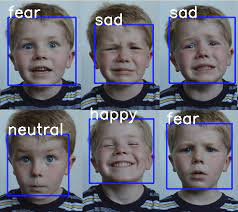

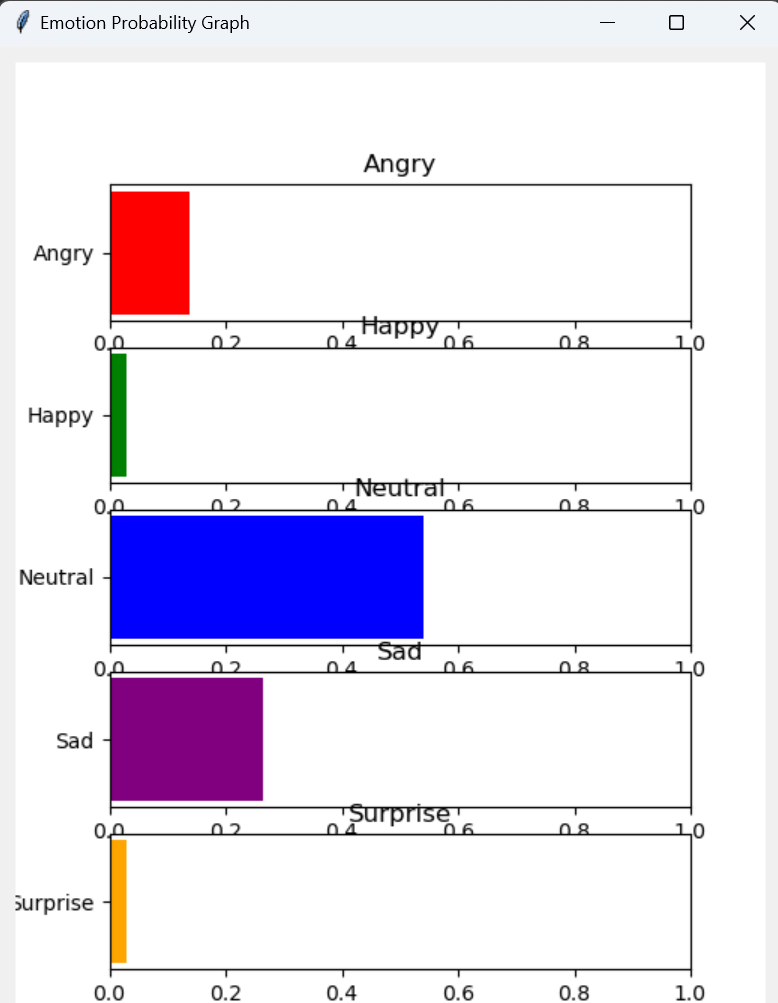

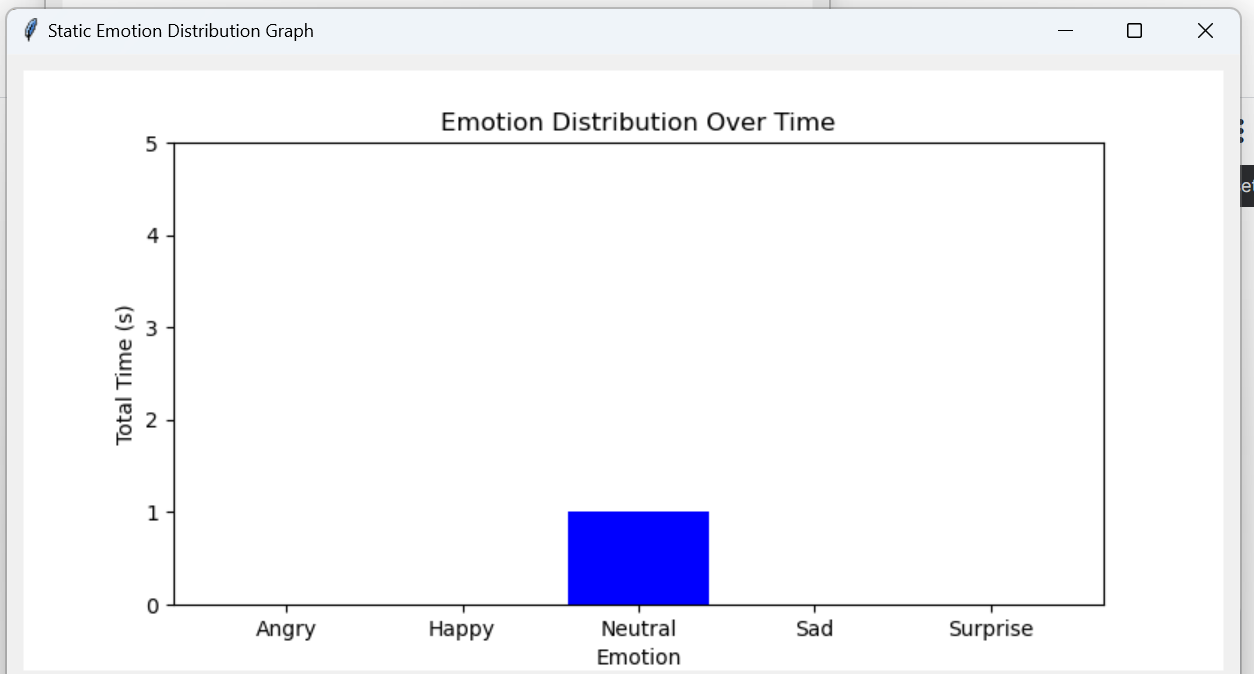